In [2]:
!pip install --upgrade pandas_profiling --user

     |████████████████████████████████| 266kB 3.4MB/s 
     |████████████████████████████████| 604kB 8.3MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 3.1MB 19.7MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 296kB 34.5MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=ddc25343c43931655312dcbce8c3ea6c1da662da0b73d2cf6da89cb263a5c553
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=07e0b6e320bc15f8bc0365a2f5e3992f67e7003186093cb1385291fadc632e6d
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Consider adding this directory to PATH or, if yo

In [3]:
!pip install bds_courseware

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas_profiling
from google.colab import drive
from urllib.request import urlopen
%matplotlib inline
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.manifold import TSNE
import umap
from bds_courseware import get_dataset
from bds_courseware.__ids import __datasets 
from bds_courseware._utils import _read_drive_data as read_data
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import requests
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import itertools
from tqdm.notebook import tqdm as tqdm
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, silhouette_samples

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Auxilarity methods

In [6]:
def plot_hist(feat,data,bins=15):
  plt.figure(figsize=(15, 5))
  sns.distplot(data[feat], bins=bins, kde=False)
  plt.ylabel('count')
  plt.title('Гистограмма для признака {}'.format(feat))
  plt.show()

In [7]:
def draw_plots(data,col_labels):
  fig = px.scatter(y='Latitude',x='Longitude', data_frame=data, color=col_labels,
                   height=700,opacity=0.75, title='Scatter plot for koordinates with {}'.format(col_labels))
  fig.show()
  fig1 = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", 
                           hover_data=["Focal depth", "Richter"],
                          zoom=2, height=800, width=1800, opacity=1, 
                           color = col_labels,
                           title='Map with {}'.format(col_labels))
  fig1.update_layout(mapbox_style="open-street-map")
  fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig1.show()
  fig2 = px.scatter_3d(y='Latitude',x='Longitude',z='Richter', data_frame=data,
                       height=700, opacity=0.75, title='3d scatter plot for coordinates and Richter with {}'.format(col_labels))
  fig2.update_traces(marker=dict(size=4,color=data[col_labels]),
                    selector=dict(mode='markers'))
  fig2.update_layout(showlegend=True)
  fig2.show()
  fig3 = px.scatter_3d(y='Latitude',x='Longitude',z='Focal depth',
                       data_frame=data, height=700, opacity=0.75,
                        title='3d scatter plot for coordinates and Focal depth with {}'.format(col_labels))
  fig3.update_traces(marker=dict(size=4,color=data[col_labels]))
  fig3.show()
  fig4 = px.scatter(x='Focal depth',y='Richter', data_frame=data, 
                    color=col_labels,height=700,opacity=0.75,
                    title='Scatter plot for Richter and Focal depth with {}'.format(col_labels))
  fig4.show()

#Read the data

In [8]:
data = pd.read_csv('gdrive/My Drive/epam/Module 9/data/quake.csv',sep=',')

In [9]:
data.head()

Focal depth  Latitude  Longitude  Richter
0           33    -52.26      28.30      6.7
1           36     45.53     150.93      5.8
2           57     41.85     142.78      5.8
3           67     29.19     141.15      6.2
4           30    -21.66     169.81      6.0

#Exploratory analysis

##Univariate analysis

In [ ]:
profiling_report = pandas_profiling.ProfileReport(data)
profiling_report.to_widgets()

/root/.local/lib/python3.6/site-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


###Latitude

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



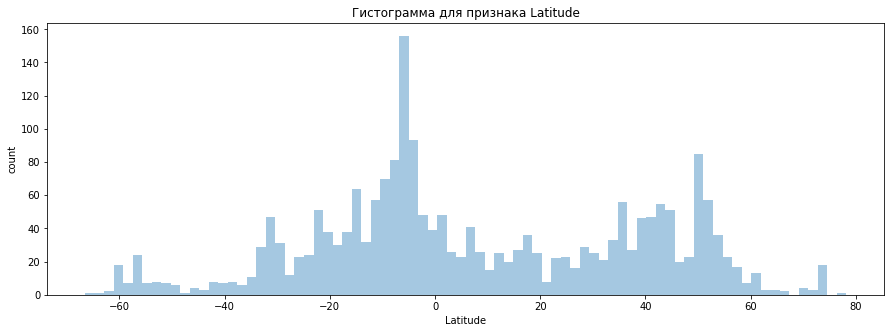

In [ ]:
plot_hist('Latitude',data, bins=80)

Выводов о распределении никаких сделать нельзя, поскольку это просто одно из координат, и она зависит от строенния земной коры, насколько я помню школьный курс географии:) . Единственное что можно сказать, это то, что больше всего землетрясений происходит в районе 5-7$^{\circ}$ южной широты и в районе 50$^{\circ}$ северной широты.

Статистические характеристики смотреть бесполезно, поскольку опять же значения признака зависят от строения земной коры (тектонические плиты там и тд).

###Longitude

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



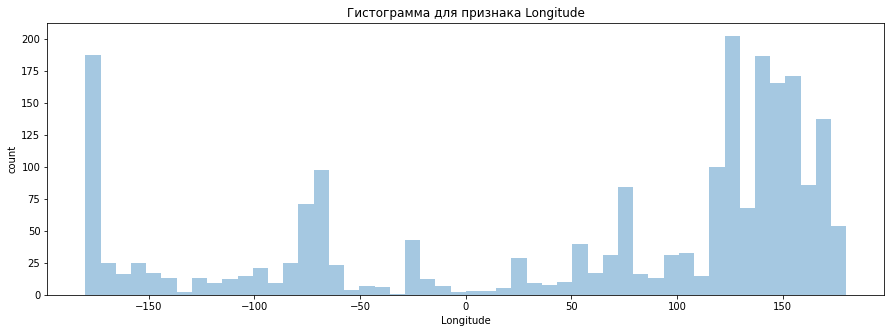

In [ ]:
plot_hist('Longitude',data, bins=50)

Тут все аналогично признаку "Latitude", распределение признака особо ни о чем не говорит в силу строения... Но можно заметить что большинство землетрясений происходят между примерно 120 серидианом восточной долготы и 170 меридианом западной долготы.

Можно достать побольше информации если совместить коодрдинаты и визуализировать, а еще больше, если их визуализировать на карте, это сделаем в дальнейшем.

###Focal depth

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



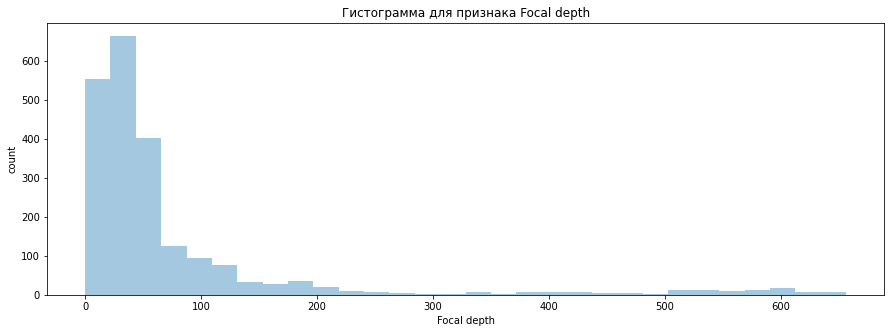

In [ ]:
plot_hist('Focal depth',data, bins=30)

Видим, что большинство землетрясений происходит на глубине до 50 метров, но также бывают землетрясения глубиной более 600 метров.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



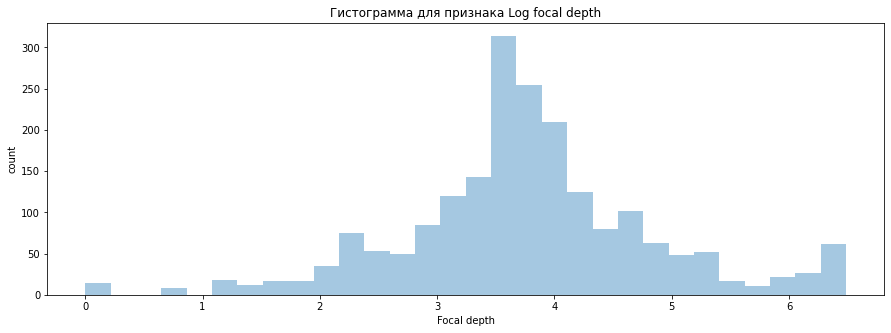

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(np.log(data[data['Focal depth']!=0]['Focal depth']), bins=30, kde=False)
plt.ylabel('count')
plt.title('Гистограмма для признака {}'.format('Log focal depth'))
plt.show()

Гистограмма выше, указывает на то, что возможно данные относительно данного признака распределены логнормально.

###Richter

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



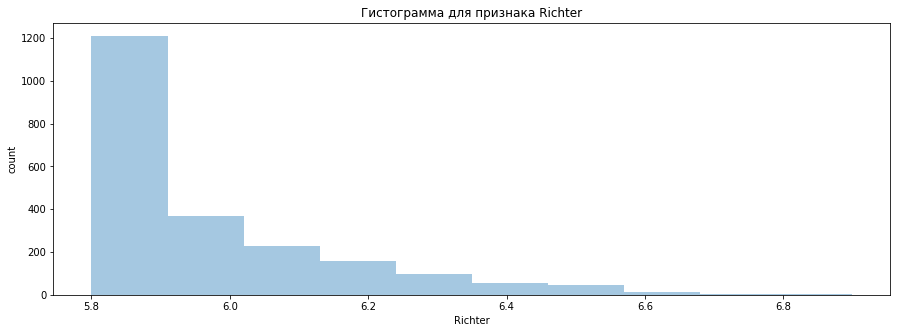

In [ ]:
plot_hist('Richter',data, bins=10)

Большинство землетрясений по шкале Рихтера имеют силу до 6 баллов.

##Multivariate analysis

###Pairplot##

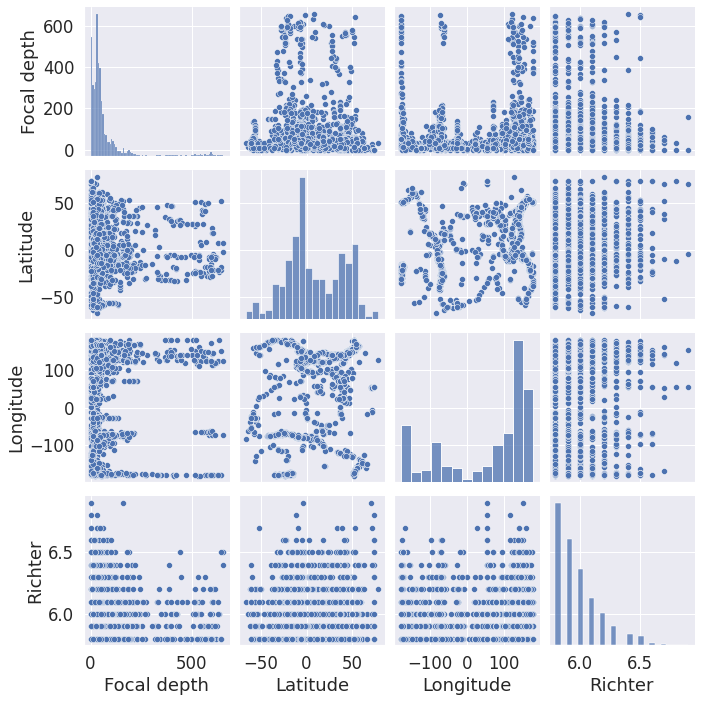

In [ ]:
sns.set(font_scale=1.5)
sns.pairplot(data=data)
plt.show()

Выводы из данного графика:


1.   Точечные графики признаков Long и Lat отдаленно напоминают карту.
2.   По графикам зависимости координат и глубины, а также из гистограмм коодинат, видно, что более глубокие землетрясения происходят в местах, где сами землетрясения происходят чаще.
3.   Наблюдается небольшая зависимость между глубиной и силой землетрясения, чем больше глубина землетрясения, тем меньше его сила, но так только до глубины примерно в 250 метров, дальше уже эта зависисмотсь не наблюдается, судя по графику.



###Latitude и Longitude

Построим точечный график этих признаков.

In [ ]:
px.scatter(y='Latitude',x='Longitude', data_frame=data)

Очертания получившегося графика похожи на карту. Нанесем данные на карту

In [ ]:
fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", hover_data=["Focal depth", "Richter"],
                        color_discrete_sequence=["fuchsia"], zoom=2, height=800,width=1800, opacity=0.5)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Как видим, большинство землетрясений происходит в районе побережья Тихого океана, что совпадает с выводами сделаными ранее. И в целом, землетрясения наблюдаются на границах тектонических плит (знаю что границы плит проходят в районе гор, что наблюдается на карте (например запад Южной Америки - горы Анды) 

Теперь посмотрим на ту же карту с маркерами, раскрашенными в соответствии с глубиной.

In [ ]:
fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", hover_data=["Focal depth", "Richter"],
                        color_discrete_sequence=["fuchsia"], zoom=2, 
                        height=800, width=1800, opacity=0.5, color = 'Focal depth')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Как и было сказано ранее, более глубокие землетрясения происходят в наиболее сейсмически неустойчивых районах.

In [ ]:
fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", hover_data=["Focal depth", "Richter"],
                        color_discrete_sequence=["fuchsia"], zoom=2, 
                        height=800, width=1800, opacity=0.3, color = 'Richter')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Сила землетрясений, в целом не особо зависит от местоположения.

#Kmeans

In [17]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(data)

In [18]:
kmeans = KMeans(n_clusters=15, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [19]:
data['y_kmeans'] = pd.Series(y_kmeans)

In [20]:
px.scatter(y='Latitude',x='Longitude', data_frame=data, color='y_kmeans',height=700)

In [21]:
fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", hover_data=["Focal depth", "Richter"],
                        zoom=2, 
                        height=800, width=1800, opacity=0.5, color = 'y_kmeans')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Исходя из визуализаций выше, нельзя сказать что разделение произошло только согласно координатам.

In [22]:
px.scatter(y='Richter',x='Focal depth', data_frame=data, color='y_kmeans')

Из графика выше также нельзя сделать каких-то значимых выводов(

In [23]:
data.y_kmeans.value_counts()

8     437
11    307
1     265
2     225
5     188
0     131
13    126
6     101
4      94
7      86
10     71
9      47
12     38
14     36
3      26
Name: y_kmeans, dtype: int64

Разбиением на 15 кластеров, мы получили очень имбалансные классы, которые трудно объяснить. Найдем оптимальное количество классов.

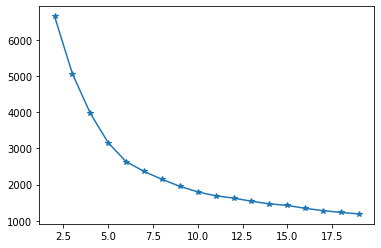

In [24]:
inertias = []
n_clust_grid = [i for i in range(2, 20)]
for n_clusters in n_clust_grid:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(n_clust_grid, inertias, marker="*")

Согласно графику "локтевого сгиба", наиболее оптимальное количество классов равно 6.

In [25]:
kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
data['y_kmeans'] = pd.Series(y_kmeans)

In [26]:
draw_plots(data,'y_kmeans')

Видим, что наблюдается разделение согласно координатам. А также на 3d графиках прослеживается связь кластеров с признаками Focal depth и Richter.

#DBSCAN

In [45]:
epsilon_param_options = np.arange(0.001, 3, 0.01)

min_samples_param_options = np.arange(2, len(data)/8, 1)

param_grid = itertools.product(epsilon_param_options, min_samples_param_options)

In [46]:
print('Amount of hyperparameters combinations: {}'.format(len(epsilon_param_options) * len(min_samples_param_options)))

Amount of hyperparameters combinations: 81300


In [47]:
params_dict = {}
best_sil_score = 0
params_dict_best_sil_score={}
best_calhar_score = 0
params_dict_best_calhar_score={}

In [ ]:
for param_set in tqdm(param_grid, total=len(epsilon_param_options) * len(min_samples_param_options)):
  dbscan = DBSCAN(eps=param_set[0], min_samples=param_set[1])
  y_dbscan = dbscan.fit_predict(X_scaled)

  if len(set(y_dbscan) - set([-1])) == 6:
    sil_score = silhouette_score(X_scaled,y_dbscan)
    calhar_score = calinski_harabasz_score(X_scaled,y_dbscan)
    if best_sil_score < sil_score:
      best_sil_score = sil_score
      params_dict_best_sil_score = param_set
    if best_calhar_score < calhar_score:
      best_calhar_score = calhar_score
      params_dict_best_calhar_score = param_set
    params_dict['{}_{}_{}'.format(len(set(y_dbscan) - set([-1])), param_set[0], param_set[1])] = param_set
    print(param_set)

(0.001, 3.0)
(0.011, 4.0)
(0.020999999999999998, 5.0)
(0.040999999999999995, 7.0)
(0.071, 11.0)
(0.071, 12.0)
(0.08099999999999999, 12.0)
(0.09099999999999998, 14.0)
(0.10099999999999998, 13.0)
(0.11099999999999999, 13.0)
(0.13099999999999998, 14.0)
(0.13099999999999998, 15.0)
(0.19099999999999998, 16.0)
(0.20099999999999996, 17.0)
(0.20099999999999996, 18.0)
(0.20099999999999996, 19.0)
(0.21099999999999997, 17.0)
(0.21099999999999997, 18.0)
(0.21099999999999997, 19.0)
(0.22099999999999997, 18.0)
(0.22099999999999997, 19.0)
(0.22099999999999997, 20.0)
(0.23099999999999996, 19.0)
(0.23099999999999996, 20.0)
(0.23099999999999996, 21.0)
(0.24099999999999996, 21.0)
(0.24099999999999996, 22.0)
(0.25099999999999995, 23.0)
(0.25099999999999995, 24.0)
(0.26099999999999995, 23.0)
(0.26099999999999995, 24.0)
(0.27099999999999996, 25.0)
(0.27099999999999996, 26.0)
(0.28099999999999997, 26.0)
(0.291, 27.0)
(0.30099999999999993, 27.0)
(0.31099999999999994, 28.0)
(0.31099999999999994, 29.0)
(0.32099

In [49]:
print(params_dict_best_sil_score)
print(best_sil_score)
print(params_dict_best_calhar_score)
print(best_calhar_score)

(0.8209999999999998, 8.0)
0.36571650157859764
(0.5309999999999999, 10.0)
221.53312176694575


In [267]:
params_dict

{'6_0.001_3.0': (0.001, 3.0),
 '6_0.011_4.0': (0.011, 4.0),
 '6_0.020999999999999998_5.0': (0.020999999999999998, 5.0),
 '6_0.040999999999999995_7.0': (0.040999999999999995, 7.0),
 '6_0.071_11.0': (0.071, 11.0),
 '6_0.071_12.0': (0.071, 12.0),
 '6_0.08099999999999999_12.0': (0.08099999999999999, 12.0),
 '6_0.09099999999999998_14.0': (0.09099999999999998, 14.0),
 '6_0.10099999999999998_13.0': (0.10099999999999998, 13.0),
 '6_0.11099999999999999_13.0': (0.11099999999999999, 13.0),
 '6_0.13099999999999998_14.0': (0.13099999999999998, 14.0),
 '6_0.13099999999999998_15.0': (0.13099999999999998, 15.0),
 '6_0.19099999999999998_16.0': (0.19099999999999998, 16.0),
 '6_0.20099999999999996_17.0': (0.20099999999999996, 17.0),
 '6_0.20099999999999996_18.0': (0.20099999999999996, 18.0),
 '6_0.20099999999999996_19.0': (0.20099999999999996, 19.0),
 '6_0.21099999999999997_17.0': (0.21099999999999997, 17.0),
 '6_0.21099999999999997_18.0': (0.21099999999999997, 18.0),
 '6_0.21099999999999997_19.0': (0.21

In [56]:
dbscan = DBSCAN(eps=0.5309999999999999, min_samples=10)

In [57]:
y_dbscan = dbscan.fit_predict(X_scaled)

In [58]:
data['label_dbscan']=pd.Series(y_dbscan)

In [59]:
draw_plots(data,'label_dbscan')

#Agglomerative clustering

In [47]:
metrics=('euclidean', 'l1', 'l2', 'manhattan', 'cosine')
linkage=('complete', 'average', 'single')
param_grid = itertools.product(metrics,linkage)

In [48]:
params_dict = {}
best_sil_score = 0
params_dict_best_sil_score={}
best_calhar_score = 0
params_dict_best_calhar_score={}

In [49]:
for param_set in tqdm(param_grid, total=15):
  print(param_set)
  hier = AgglomerativeClustering(6,affinity=param_set[0],linkage=param_set[1])
  y_hier = hier.fit_predict(X_scaled)
  if len(set(y_hier) - set([-1])) == 6:
    sil_score = silhouette_score(X_scaled,y_hier)
    calhar_score = calinski_harabasz_score(X_scaled,y_hier)
    if best_sil_score < sil_score:
      best_sil_score = sil_score
      params_dict_best_sil_score = param_set
    if best_calhar_score < calhar_score:
      best_calhar_score = calhar_score
      params_dict_best_calhar_score = param_set
    params_dict['{}_{}_{}'.format(len(set(y_hier) - set([-1])), param_set[0], param_set[1])] = param_set
    print(param_set)

('euclidean', 'complete')
('euclidean', 'complete')
('euclidean', 'average')
('euclidean', 'average')
('euclidean', 'single')
('euclidean', 'single')
('l1', 'complete')
('l1', 'complete')
('l1', 'average')
('l1', 'average')
('l1', 'single')
('l1', 'single')
('l2', 'complete')
('l2', 'complete')
('l2', 'average')
('l2', 'average')
('l2', 'single')
('l2', 'single')
('manhattan', 'complete')
('manhattan', 'complete')
('manhattan', 'average')
('manhattan', 'average')
('manhattan', 'single')
('manhattan', 'single')
('cosine', 'complete')
('cosine', 'complete')
('cosine', 'average')
('cosine', 'average')
('cosine', 'single')
('cosine', 'single')



In [50]:
print(params_dict_best_sil_score)
print(best_sil_score)
print(params_dict_best_calhar_score)
print(best_calhar_score)

('l1', 'single')
0.39797596062506063
('cosine', 'average')
646.5338155686675


In [68]:
hier = AgglomerativeClustering(6,affinity='euclidean',linkage='ward')
y_hier = hier.fit_predict(X_scaled)

In [69]:
sil_score = silhouette_score(X_scaled,y_hier)
calhar_score = calinski_harabasz_score(X_scaled,y_hier)
print(sil_score)
print(calhar_score)

0.30622737211823203
750.0327475624882


In [70]:
data['label_hier']=pd.Series(y_hier)

In [71]:
draw_plots(data,'label_hier')

#Using metrics

In [60]:
label_cols = ['label_dbscan','label_hier']

In [61]:
for col in label_cols:
    print(f'Adjusted MI score for {col} = {adjusted_mutual_info_score(data["y_kmeans"], data[col])}')

Adjusted MI score for label_dbscan = 0.4920872424010652
Adjusted MI score for label_hier = 0.6306198276155836


In [62]:
for col in label_cols:
    print(f'Adjusted rand score for {col} = {adjusted_rand_score(data["y_kmeans"], data[col])}')

Adjusted rand score for label_dbscan = 0.3711399804370384
Adjusted rand score for label_hier = 0.6055666734675528


In [63]:
label_cols.append('y_kmeans')
for col in label_cols:
    print(f'Calinsky-Harabaz score for {col} = {calinski_harabasz_score(X_scaled, data[col])}')

Calinsky-Harabaz score for label_dbscan = 221.53312176694575
Calinsky-Harabaz score for label_hier = 750.0327475624882
Calinsky-Harabaz score for y_kmeans = 1002.2613236045231


In [64]:
for col in label_cols:
    print(f'Calinsky-Harabaz score for {col} = {silhouette_score(X_scaled, data[col])}')

Calinsky-Harabaz score for label_dbscan = 0.20410760284120447
Calinsky-Harabaz score for label_hier = 0.30622737211823203
Calinsky-Harabaz score for y_kmeans = 0.36220509041701343


#Conclusion

Согласно метрикам алгоритм Kmeans показал результат лучше, что также наблюдается и на графиках. При этом стоит отметить что AgglomerativeClustering показал очень похожие результаты (при этом не выделилось отдельного кластера по силе землетрясений).

In [ ]:
draw_plots(data,'y_kmeans')

Описание кластеров:

Кластер 0: Расположение точек преимущественно между Австралией и Евразией, часть относиться к Океании. Также присутствует в Индийском океане и к югу от Новой Зеландии. Землетрясения из этого кластера по шкале Рихтера не сильные и не глубокие.

Кластер 1: Преимущественно точки располагаются в Северной Америке, также есть экземпляры в Атлантическом океане. По глубине не выделяются, а по силе немного превосходят нулевой кластер.

Кластер 2: Не имеет преимущественного местоположения, распределен по всей земле. Землетрясения не глубокие, но при этом самые сильные.

Кластер 3: Расположен преимущественно на островах и в водах у восточной части Евразии или в западных водах Тихого Океана (Япония, Куриллы, Камчатка и тд.) и частично имебт место в южной части Евразии. По силе и глубине ничем не выделяется.

Кластер 4: По метоположению сфокусирован в Южной Америке и водах океанов омывающих ее, также имеется участок к востоку от Австралии. По силе сопоставим с первым кластером, а по глубине есть случаи, которые сильнее всех случаев из описанных выше классов.

Кластер 5: Примущественно присутствует в западных водах Тихого океана, но также есть случаи и в Южной Америке. Самые глубокие землетрясения. По силе не выделяются.

